In [1]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset


Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d pmigdal/alien-vs-predator-images


 35% 5.00M/14.1M [00:01<00:03, 2.93MB/s]
100% 14.1M/14.1M [00:01<00:00, 7.93MB/s]


In [ ]:
!unzip alien-vs-predator-images

In [4]:
from fastai.vision import *
from fastai import *

In [5]:
path=Path('alien_vs_predator_thumbnails/data')

In [6]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [7]:
data = (ImageList.from_folder(path/'train')
        .random_split_by_pct()       
        .label_from_folder()           
        .add_test_folder('../validation')   
        .transform(tfms, size=224) 
        .databunch(bs=64))  

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


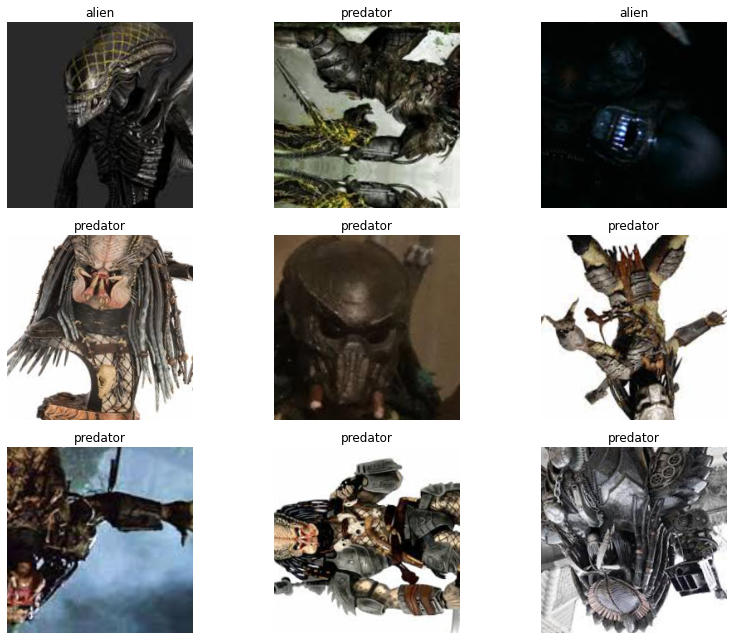

In [8]:
data.show_batch(rows=3, figsize=(12,9))

In [9]:
len(data.train_ds)

556

In [10]:
len(data.valid_ds)

138

In [11]:
learn=cnn_learner(data,models.resnet50,metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


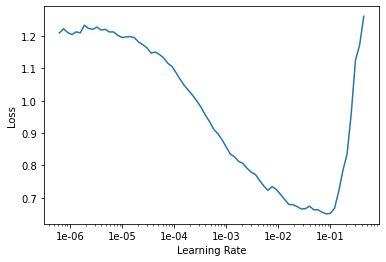

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2,1e-02)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.863475,5.194952,0.608696,0.391304,00:11
1,0.551740,1.401861,0.710145,0.289855,00:10


In [15]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


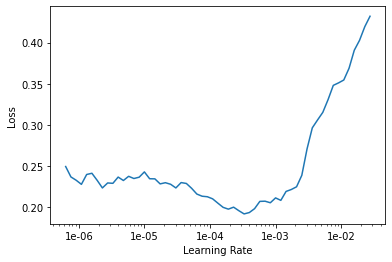

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(4,1e-05)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.253069,0.445332,0.884058,0.115942,00:13
1,0.232799,0.247248,0.927536,0.072464,00:13
2,0.238762,0.236173,0.920290,0.079710,00:13
3,0.206865,0.234419,0.927536,0.072464,00:13


In [21]:
learn.save('stage-2')

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


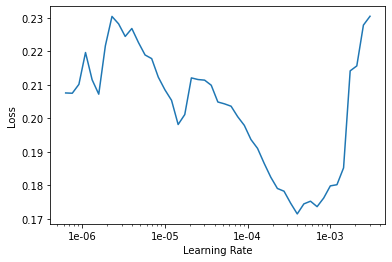

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(3,1e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.184439,0.198821,0.949275,0.050725,00:13
1,0.186903,0.202522,0.949275,0.050725,00:13
2,0.162264,0.186011,0.942029,0.057971,00:13


In [26]:
learn.save('stage-3')

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


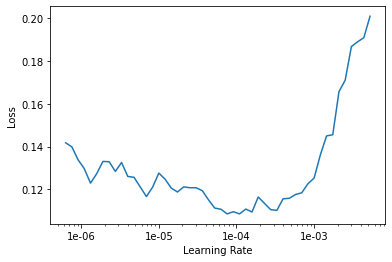

In [28]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(4,2e-5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.071779,0.172060,0.949275,0.050725,00:13
1,0.073463,0.162637,0.956522,0.043478,00:13
2,0.070398,0.159240,0.949275,0.050725,00:13
3,0.069319,0.158298,0.949275,0.050725,00:13


In [31]:
learn.save('stage-4')

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

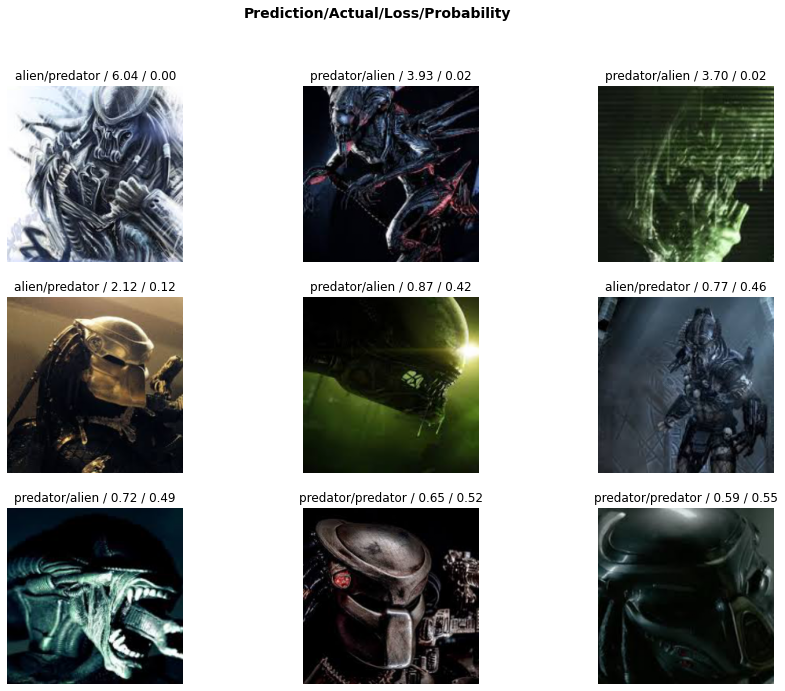

In [33]:
interp.plot_top_losses(9, figsize=(15,11))

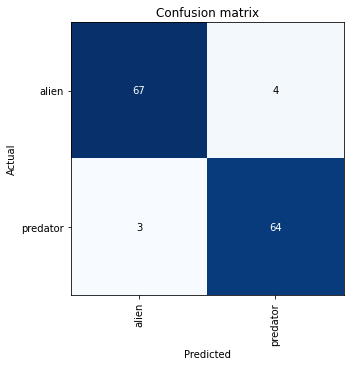

In [34]:
interp.plot_confusion_matrix(figsize=(5,5))

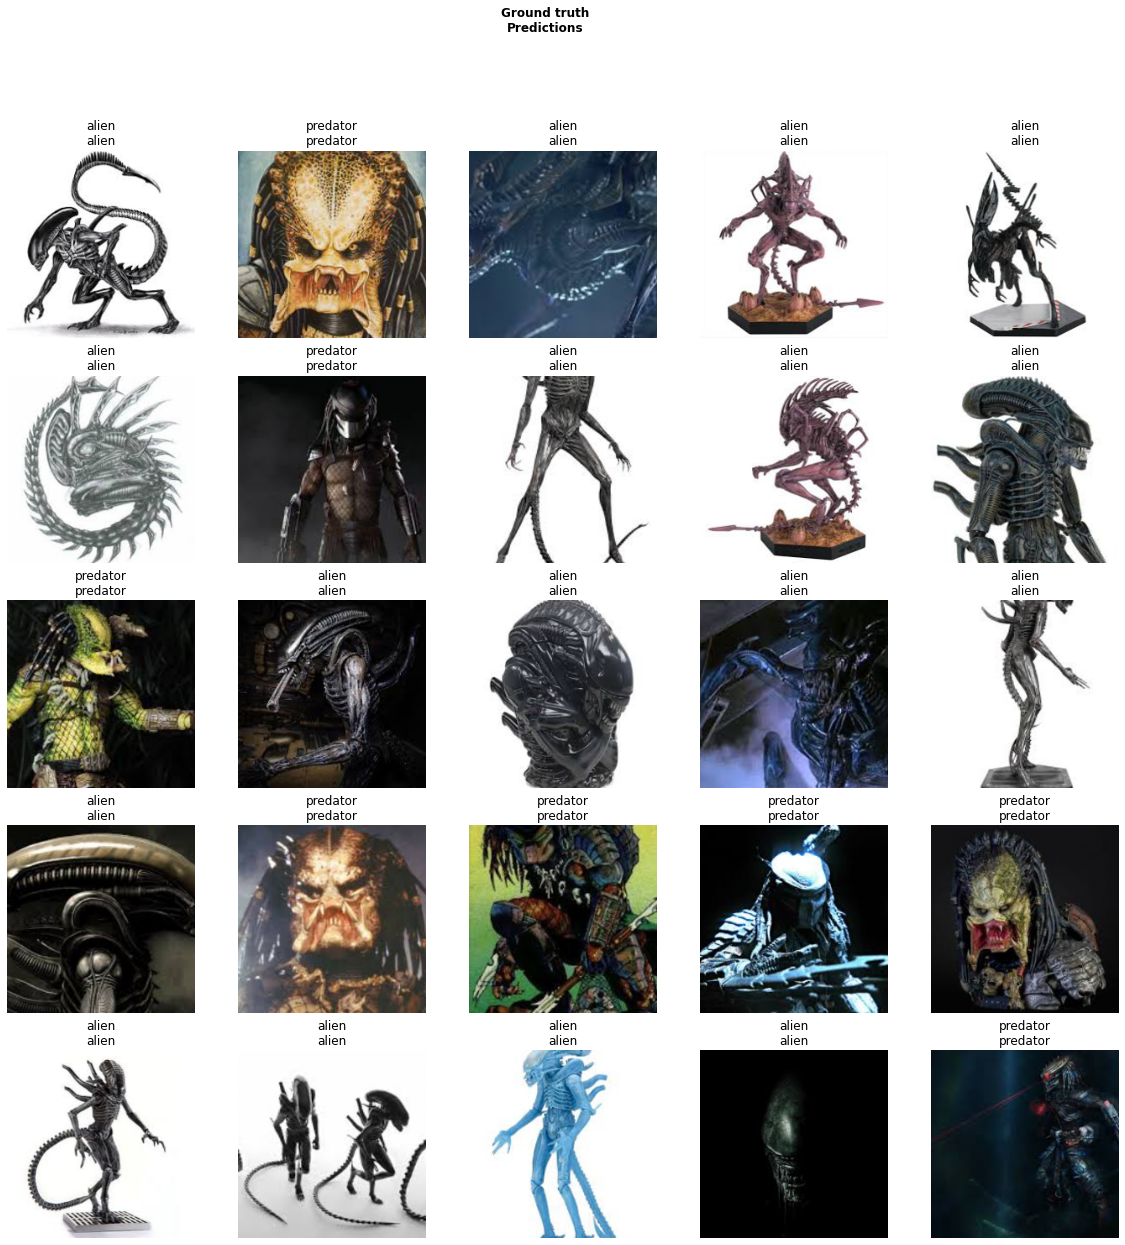

In [35]:
learn.show_results()

In [45]:
img=open_image('alien_vs_predator_thumbnails/data/validation/predator/33.jpg')

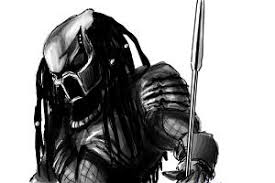

In [46]:
img

In [47]:
learn.predict(img)

(Category tensor(1), tensor(1), tensor([0.0093, 0.9907]))